In [7]:
import numpy as np
import pandas as pd
from scipy import stats
import psycopg2

%matplotlib inline
import matplotlib.pyplot as plt

# Connect to database
conn = psycopg2.connect("dbname='dreamteam' user='weisihan' host='localhost' port='5432' password='weisi9527sj'")
cur = conn.cursor()
# load csgo.profiles
cur.execute('SELECT followed_profile_id, COUNT(followed_profile_id) from core.followers GROUP BY followed_profile_id ORDER BY followed_profile_id;')
colnames = [desc[0] for desc in cur.description]
sql_follower_count=  cur.fetchall()
sql_follower_count=  pd.DataFrame(sql_follower_count, columns = colnames)

cur.close()
conn.close()





In [8]:
sql_follower_count

,followed_profile_id,count
0,1,1
1,2,4
2,3,10
3,4,5
4,5,5
5,6,1
6,7,25
7,8,3
8,9,10
9,10,12


In [9]:
follower_count=np.array(sql_follower_count)

In [15]:
list_follower_count=[]
for x in follower_count:list_follower_count.append(x[1])
stats.describe(list_follower_count)

DescribeResult(nobs=29630, minmax=(1, 120), mean=1.4361120485993926, variance=1.7258955789260064, skewness=33.55202341426567, kurtosis=2509.7177881019293)

In [16]:
follower_count

array([[     1,      1],
       [     2,      4],
       [     3,     10],
       ..., 
       [112531,      1],
       [112542,      1],
       [112560,      2]])

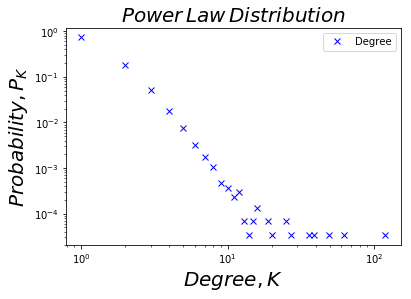

In [17]:
from collections import defaultdict
degs=defaultdict(int)
for x in list_follower_count:degs[x]+=1
items = sorted(degs.items())
x, y = np.array(items).T
y = [float(i) / sum(y) for i in y]
plt.plot(x, y, 'bx')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Degree'])
plt.xlabel('$Degree,K$', fontsize = 20)
plt.ylabel('$Probability,P_K$', fontsize = 20)
plt.title('$Power\, Law\,Distribution$', fontsize = 20)
plt.show()

In [18]:
import powerlaw
np.seterr(divide='ignore', invalid='ignore')
fit = powerlaw.Fit(list_follower_count)
##fit the tail 

Calculating best minimal value for power law fit


In [19]:
fit.power_law.alpha,fit.xmin,fit.power_law.D

(4.2779295964324469, 7.0, 0.040533335268377546)

In [27]:
list_follower_count = pd.Series( (v for v in list_follower_count) )

In [28]:
tail=list_follower_count[list_follower_count>7]
body=list_follower_count[list_follower_count<7]

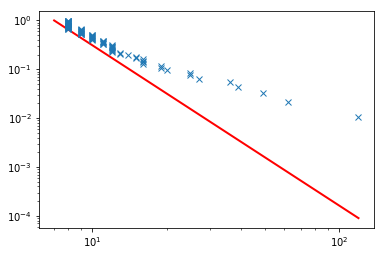

In [29]:
x_=np.asarray(range(1,len(tail)+1))
f=lambda x:1-x/(len(tail)+1)
Fit=fit.power_law.plot_ccdf(color='r', linewidth=2)
Fit.loglog(np.sort(tail),f(x_),'x')
# Plot of the tail 